# Week 1
Let's go!!!

### Load the data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [4]:
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


#### Report total number of crimes in the data set: 2.16M

In [5]:
df['PdId'].count()

2160953

#### List the various categories of crime and sum the number of crimes in each category

In [6]:
list(pd.unique(df["Category"]))

['VEHICLE THEFT',
 'LARCENY/THEFT',
 'OTHER OFFENSES',
 'FRAUD',
 'SEX OFFENSES, FORCIBLE',
 'ASSAULT',
 'NON-CRIMINAL',
 'BURGLARY',
 'LOITERING',
 'ROBBERY',
 'SUSPICIOUS OCC',
 'FORGERY/COUNTERFEITING',
 'DRUG/NARCOTIC',
 'TRESPASS',
 'VANDALISM',
 'WARRANTS',
 'SECONDARY CODES',
 'WEAPON LAWS',
 'MISSING PERSON',
 'DRUNKENNESS',
 'STOLEN PROPERTY',
 'RECOVERED VEHICLE',
 'PROSTITUTION',
 'ARSON',
 'EMBEZZLEMENT',
 'LIQUOR LAWS',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'KIDNAPPING',
 'SUICIDE',
 'BRIBERY',
 'FAMILY OFFENSES',
 'SEX OFFENSES, NON FORCIBLE',
 'BAD CHECKS',
 'GAMBLING',
 'EXTORTION',
 'PORNOGRAPHY/OBSCENE MAT',
 'TREA']

In [7]:
no_crimes = df.groupby("Category").count()['PdId']
no_crimes = no_crimes.sort_values(ascending=False)
# no_crimes.values
# list(no_crimes.index)

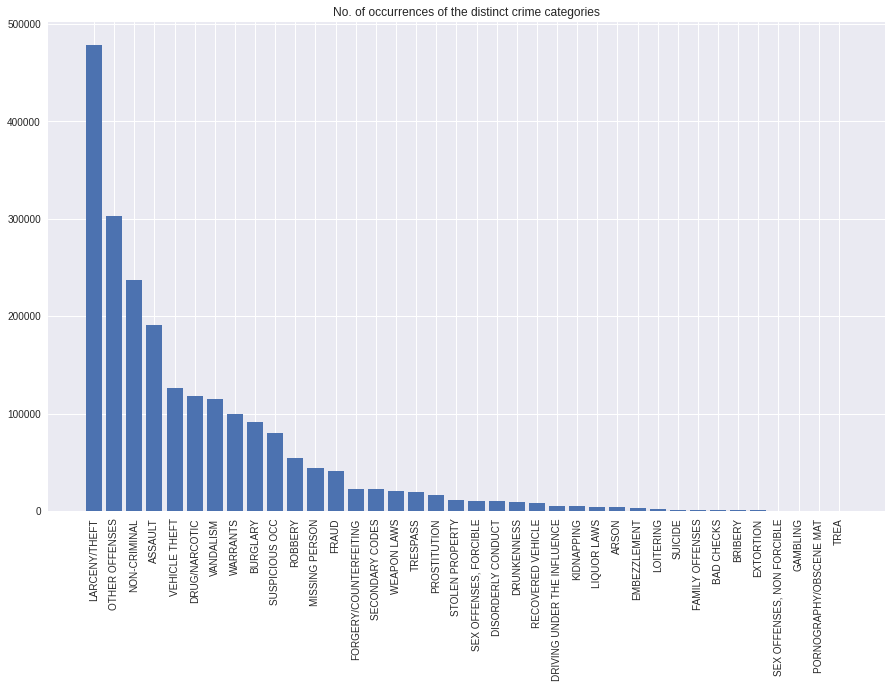

In [8]:
values = list(no_crimes.values)
labels = list(no_crimes.index)


# plt.xkcd(1,100,1)
plt.figure(figsize=(15,9))
plt.style.use('seaborn')
plt.title('No. of occurrences of the distinct crime categories')
plt.xticks(rotation='vertical')
plt.bar(labels, values)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Time to explore crime statistics over time. Count the number of crimes per year

In [9]:
df['TSDate'] = df.Date.apply(pd.Timestamp)
df['Year'] = df['TSDate'].dt.year
crimes_per_year = df.groupby('Year').count()['PdId']

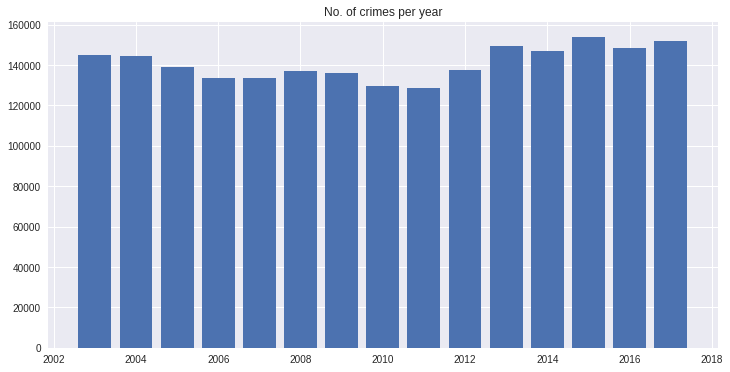

In [10]:
values = list(crimes_per_year.values)[:-1]
labels = list(crimes_per_year.index)[:-1]

# plt.xkcd(1,100,1)
plt.style.use('seaborn')
plt.figure(figsize=(12,6))
plt.title('No. of crimes per year')
plt.xticks(rotation='horizontal')
plt.bar(labels, values)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Let's select these crimes

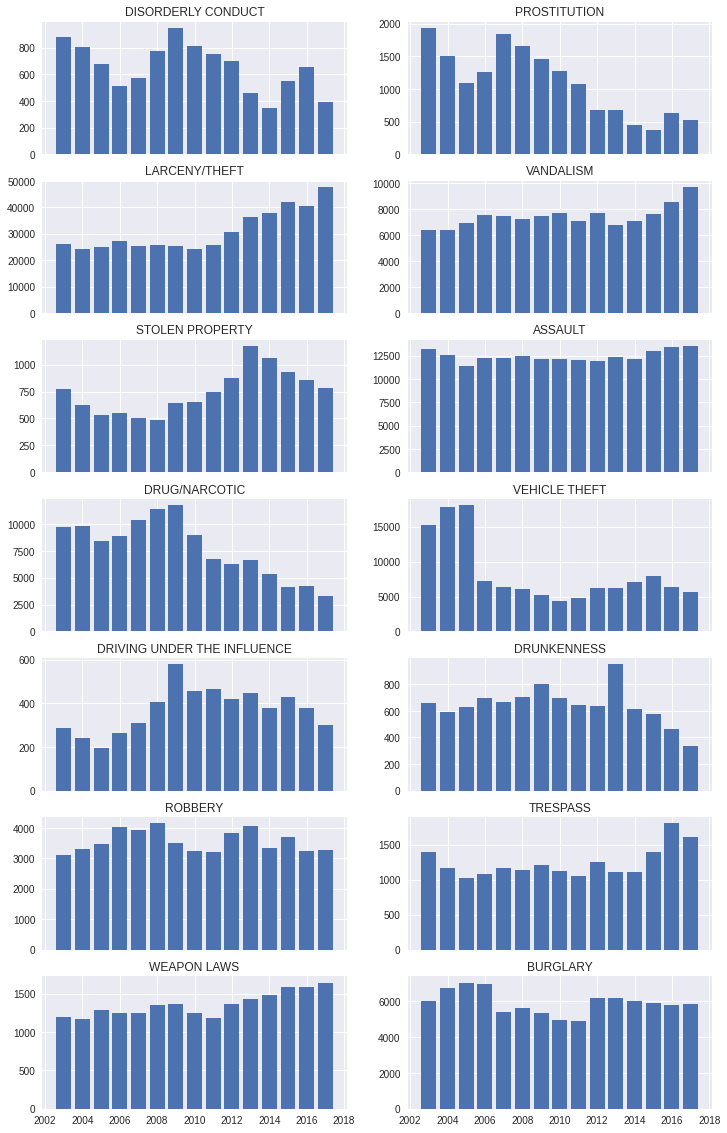

In [12]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

fig, axs = plt.subplots(7,2, sharex=True, figsize=(12,20))

for i,crime in enumerate(focuscrimes):
    series_crime_year = df[df["Category"] == crime].groupby("Year").count()["PdId"]
    values = list(series_crime_year.values)[:-1]
    labels = list(series_crime_year.index)[:-1]
    axs[i//2, i%2].bar(labels, values)
    axs[i//2, i%2].set_title(crime)